In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('pii_dataset.csv', encoding='ISO-8859-1')

In [3]:
# Display the first few rows to check if the data is loaded correctly
print(df.head())

                               document  \
0  1073d46f-2241-459b-ab01-851be8d26436   
1  5ec717a9-17ee-48cd-9d76-30ae256c9354   
2  353da41e-7799-4071-ab20-d959b362612e   
3  9324ee01-7bdc-41b1-a7a5-01307f72c20d   
4  971fe266-2739-4f1b-979b-7f64e07d5a4a   

                                                text  \
0  My name is Aaliyah Popova, and I am a jeweler ...   
1  My name is Konstantin Becker, and I'm a develo...   
2  As Mieko Mitsubishi, an account manager at a p...   
3  My name is Kazuo Sun, and I'm an air traffic c...   
4  My name is Arina Sun, and I'm a dental hygieni...   

                                              tokens  \
0  ['My', 'name', 'is', 'Aaliyah', 'Popova,', 'an...   
1  ['My', 'name', 'is', 'Konstantin', 'Becker,', ...   
2  ['As', 'Mieko', 'Mitsubishi,', 'an', 'account'...   
3  ['My', 'name', 'is', 'Kazuo', 'Sun,', 'and', "...   
4  ['My', 'name', 'is', 'Arina', 'Sun,', 'and', "...   

                                 trailing_whitespace  \
0  [True, T

In [4]:
#Basic Information about the Dataset
print("\nDataset Information:\n")
print(df.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             4434 non-null   object
 1   text                 4434 non-null   object
 2   tokens               4434 non-null   object
 3   trailing_whitespace  4434 non-null   object
 4   labels               4434 non-null   object
 5   prompt               4434 non-null   object
 6   prompt_id            4434 non-null   int64 
 7   name                 4434 non-null   object
 8   email                4434 non-null   object
 9   phone                4434 non-null   object
 10  job                  4434 non-null   object
 11  address              4434 non-null   object
 12  username             1322 non-null   object
 13  url                  1322 non-null   object
 14  hobby                4434 non-null   object
 15  len                  4434 non-nu

In [5]:
print("\nSummary Statistics:\n")
print(df.describe(include='all'))


Summary Statistics:

                                    document  \
count                                   4434   
unique                                  4434   
top     1073d46f-2241-459b-ab01-851be8d26436   
freq                                       1   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

                                                     text  \
count                                                4434   
unique                                               4434   
top     My name is Aaliyah Popova, and I am a jeweler ...   
freq                                                    1   
mean                                                  NaN   
std                                

In [6]:
#Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

document                  0
text                      0
tokens                    0
trailing_whitespace       0
labels                    0
prompt                    0
prompt_id                 0
name                      0
email                     0
phone                     0
job                       0
address                   0
username               3112
url                    3112
hobby                     0
len                       0
dtype: int64


In [7]:
# Data Cleaning - Removing duplicates (if any)
df.drop_duplicates(inplace=True)

In [8]:
# Analyzing the Distribution of PII Categories
pii_columns = ['name', 'email', 'phone', 'job', 'address', 'username', 'url', 'hobby']

In [9]:
# Check how many records contain PII data
pii_distribution = df[pii_columns].notnull().sum()
print("\nDistribution of PII Data:\n")
print(pii_distribution)


Distribution of PII Data:

name        4434
email       4434
phone       4434
job         4434
address     4434
username    1322
url         1322
hobby       4434
dtype: int64



Missing Values:

document                  0
text                      0
tokens                    0
trailing_whitespace       0
labels                    0
prompt                    0
prompt_id                 0
name                      0
email                     0
phone                     0
job                       0
address                   0
username               3112
url                    3112
hobby                     0
len                       0
dtype: int64


<ipython-input-10-e65541f6065b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='coolwarm')


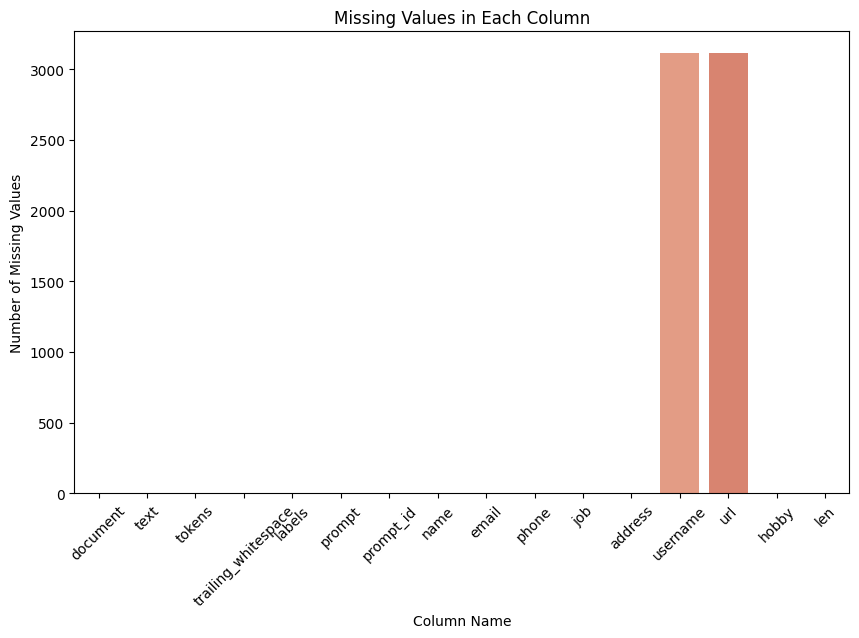

In [10]:
# Check for missing values in the dataset
print("\nMissing Values:\n")
missing_values = df.isnull().sum()
print(missing_values)

# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='coolwarm')
plt.title('Missing Values in Each Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Column Name')
plt.xticks(rotation=45)
plt.show()


<ipython-input-11-5ee976f057cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pii_distribution.index, y=pii_distribution.values, palette='viridis')


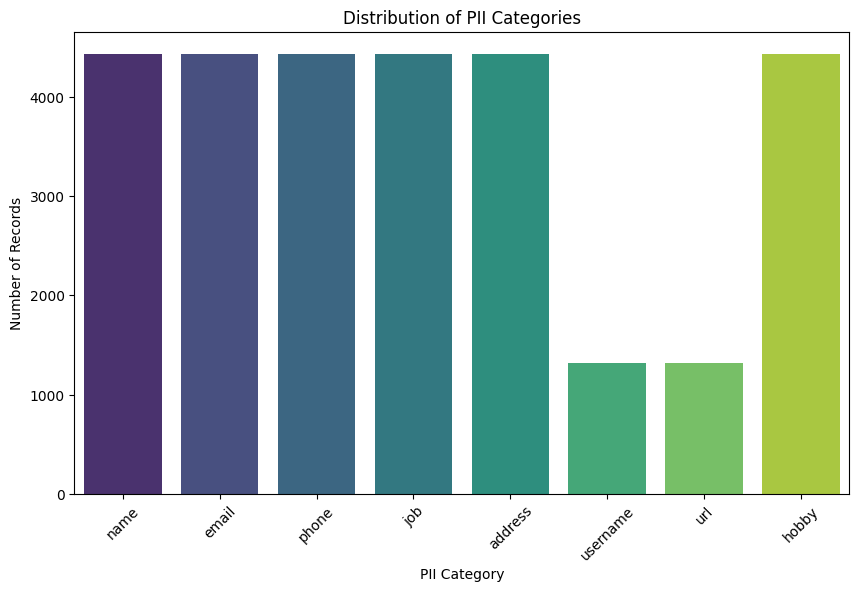

In [11]:
# Visualizations
# Plotting the distribution of PII categories
plt.figure(figsize=(10, 6))
sns.barplot(x=pii_distribution.index, y=pii_distribution.values, palette='viridis')
plt.title('Distribution of PII Categories')
plt.ylabel('Number of Records')
plt.xlabel('PII Category')
plt.xticks(rotation=45)
plt.show()

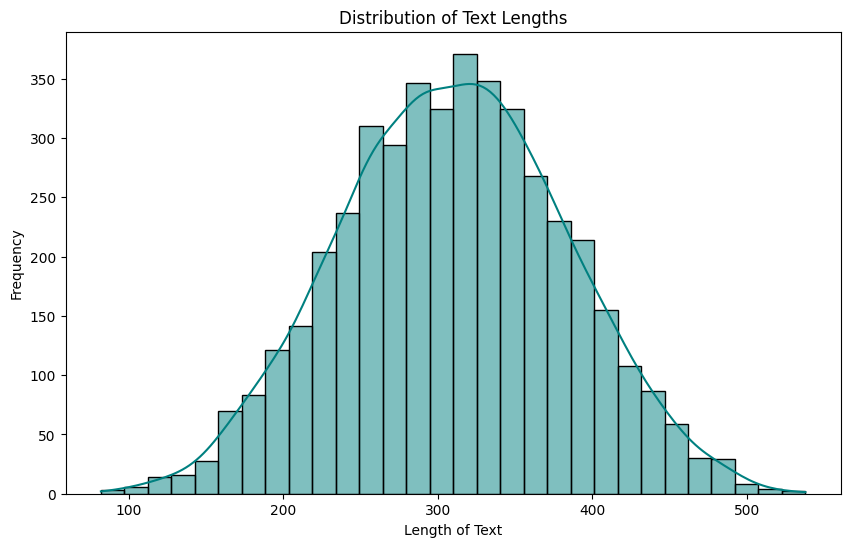

In [12]:
# Histogram of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['len'], bins=30, kde=True, color='teal')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Analyzing the Labels
labels = df['labels'].apply(lambda x: eval(x))  # Convert string representation of list to list


In [14]:
# Counting occurrences of each label type
label_counts = pd.Series([label for sublist in labels for label in sublist]).value_counts()
print("\nLabel Counts:\n")
print(label_counts)


Label Counts:

O                   1333514
B-NAME_STUDENT        11104
I-STREET_ADDRESS       8577
I-NAME_STUDENT         5667
B-EMAIL                3794
B-STREET_ADDRESS       3543
I-PHONE_NUM            3389
B-PHONE_NUM            2419
B-USERNAME              718
B-URL_PERSONAL          620
Name: count, dtype: int64


<ipython-input-15-5323226e7041>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='coolwarm')


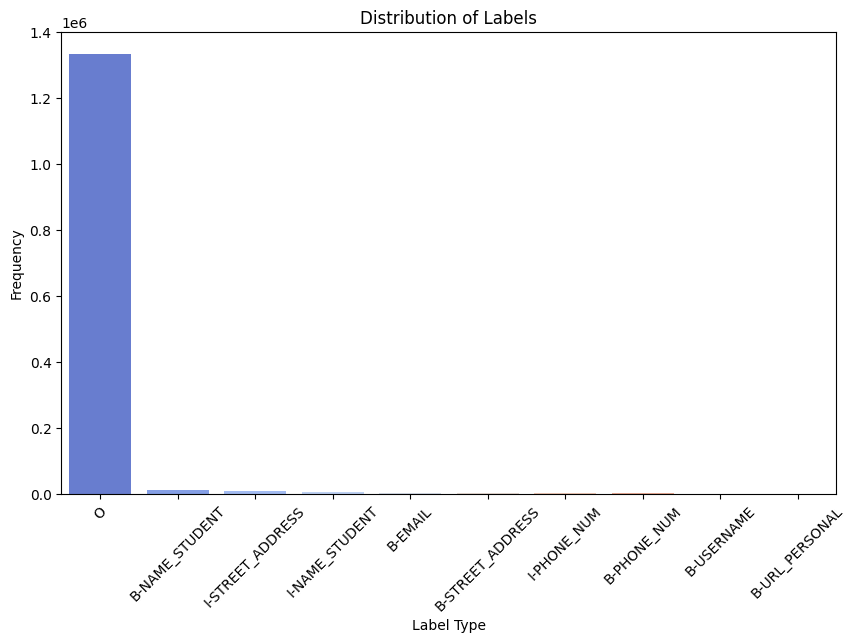

In [15]:
# Plotting label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='coolwarm')
plt.title('Distribution of Labels')
plt.ylabel('Frequency')
plt.xlabel('Label Type')
plt.xticks(rotation=45)
plt.show()

In [16]:
train=pd.read_csv(r"pii_dataset.csv", encoding='ISO-8859-1')
test=pd.read_csv(r"pii_dataset.csv", encoding='ISO-8859-1')
submission=pd.read_csv(r"pii_dataset.csv", encoding='ISO-8859-1')

In [17]:
train.head()

,document,text,tokens,trailing_whitespace,labels,prompt,prompt_id,name,email,phone,job,address,username,url,hobby,len
0,1073d46f-2241-459b-ab01-851be8d26436,"My name is Aaliyah Popova, and I am a jeweler ...","['My', 'name', 'is', 'Aaliyah', 'Popova,', 'an...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Aaliyah Popova is a jeweler with 13 year...,1,Aaliyah Popova,aaliyah.popova4783@aol.edu,(95) 94215-7906,jeweler,97 Lincoln Street,NaN,NaN,Podcasting,363
1,5ec717a9-17ee-48cd-9d76-30ae256c9354,"My name is Konstantin Becker, and I'm a develo...","['My', 'name', 'is', 'Konstantin', 'Becker,', ...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Konstantin Becker is a developer with 2 ...,1,Konstantin Becker,konstantin.becker@gmail.com,0475 4429797,developer,826 Webster Street,NaN,NaN,Quilting,255
2,353da41e-7799-4071-ab20-d959b362612e,"As Mieko Mitsubishi, an account manager at a p...","['As', 'Mieko', 'Mitsubishi,', 'an', 'account'...","[True, True, True, True, True, True, True, Tru...","['O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O',...",\n Mieko Mitsubishi is a account manager. W...,3,Mieko Mitsubishi,mieko_mitsubishi@msn.org,+27 61 222 4762,account manager,1309 Southwest 71st Terrace,NaN,NaN,Metal detecting,259
3,9324ee01-7bdc-41b1-a7a5-01307f72c20d,"My name is Kazuo Sun, and I'm an air traffic c...","['My', 'name', 'is', 'Kazuo', 'Sun,', 'and', ""...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Kazuo Sun is a air traffic controller wi...,1,Kazuo Sun,kazuosun@hotmail.net,0304 2215930,air traffic controller,736 Sicard Street Southeast,NaN,NaN,Amateur radio,281
4,971fe266-2739-4f1b-979b-7f64e07d5a4a,"My name is Arina Sun, and I'm a dental hygieni...","['My', 'name', 'is', 'Arina', 'Sun,', 'and', ""...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Arina Sun is a dental hygienist. Write a...,3,Arina Sun,arina-sun@gmail.net,0412 1245924,dental hygienist,5701 North 67th Avenue,NaN,NaN,Related,210


In [18]:
test.head()

,document,text,tokens,trailing_whitespace,labels,prompt,prompt_id,name,email,phone,job,address,username,url,hobby,len
0,1073d46f-2241-459b-ab01-851be8d26436,"My name is Aaliyah Popova, and I am a jeweler ...","['My', 'name', 'is', 'Aaliyah', 'Popova,', 'an...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Aaliyah Popova is a jeweler with 13 year...,1,Aaliyah Popova,aaliyah.popova4783@aol.edu,(95) 94215-7906,jeweler,97 Lincoln Street,NaN,NaN,Podcasting,363
1,5ec717a9-17ee-48cd-9d76-30ae256c9354,"My name is Konstantin Becker, and I'm a develo...","['My', 'name', 'is', 'Konstantin', 'Becker,', ...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Konstantin Becker is a developer with 2 ...,1,Konstantin Becker,konstantin.becker@gmail.com,0475 4429797,developer,826 Webster Street,NaN,NaN,Quilting,255
2,353da41e-7799-4071-ab20-d959b362612e,"As Mieko Mitsubishi, an account manager at a p...","['As', 'Mieko', 'Mitsubishi,', 'an', 'account'...","[True, True, True, True, True, True, True, Tru...","['O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O',...",\n Mieko Mitsubishi is a account manager. W...,3,Mieko Mitsubishi,mieko_mitsubishi@msn.org,+27 61 222 4762,account manager,1309 Southwest 71st Terrace,NaN,NaN,Metal detecting,259
3,9324ee01-7bdc-41b1-a7a5-01307f72c20d,"My name is Kazuo Sun, and I'm an air traffic c...","['My', 'name', 'is', 'Kazuo', 'Sun,', 'and', ""...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Kazuo Sun is a air traffic controller wi...,1,Kazuo Sun,kazuosun@hotmail.net,0304 2215930,air traffic controller,736 Sicard Street Southeast,NaN,NaN,Amateur radio,281
4,971fe266-2739-4f1b-979b-7f64e07d5a4a,"My name is Arina Sun, and I'm a dental hygieni...","['My', 'name', 'is', 'Arina', 'Sun,', 'and', ""...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Arina Sun is a dental hygienist. Write a...,3,Arina Sun,arina-sun@gmail.net,0412 1245924,dental hygienist,5701 North 67th Avenue,NaN,NaN,Related,210


In [19]:
submission.head()

,document,text,tokens,trailing_whitespace,labels,prompt,prompt_id,name,email,phone,job,address,username,url,hobby,len
0,1073d46f-2241-459b-ab01-851be8d26436,"My name is Aaliyah Popova, and I am a jeweler ...","['My', 'name', 'is', 'Aaliyah', 'Popova,', 'an...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Aaliyah Popova is a jeweler with 13 year...,1,Aaliyah Popova,aaliyah.popova4783@aol.edu,(95) 94215-7906,jeweler,97 Lincoln Street,NaN,NaN,Podcasting,363
1,5ec717a9-17ee-48cd-9d76-30ae256c9354,"My name is Konstantin Becker, and I'm a develo...","['My', 'name', 'is', 'Konstantin', 'Becker,', ...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Konstantin Becker is a developer with 2 ...,1,Konstantin Becker,konstantin.becker@gmail.com,0475 4429797,developer,826 Webster Street,NaN,NaN,Quilting,255
2,353da41e-7799-4071-ab20-d959b362612e,"As Mieko Mitsubishi, an account manager at a p...","['As', 'Mieko', 'Mitsubishi,', 'an', 'account'...","[True, True, True, True, True, True, True, Tru...","['O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O',...",\n Mieko Mitsubishi is a account manager. W...,3,Mieko Mitsubishi,mieko_mitsubishi@msn.org,+27 61 222 4762,account manager,1309 Southwest 71st Terrace,NaN,NaN,Metal detecting,259
3,9324ee01-7bdc-41b1-a7a5-01307f72c20d,"My name is Kazuo Sun, and I'm an air traffic c...","['My', 'name', 'is', 'Kazuo', 'Sun,', 'and', ""...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Kazuo Sun is a air traffic controller wi...,1,Kazuo Sun,kazuosun@hotmail.net,0304 2215930,air traffic controller,736 Sicard Street Southeast,NaN,NaN,Amateur radio,281
4,971fe266-2739-4f1b-979b-7f64e07d5a4a,"My name is Arina Sun, and I'm a dental hygieni...","['My', 'name', 'is', 'Arina', 'Sun,', 'and', ""...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Arina Sun is a dental hygienist. Write a...,3,Arina Sun,arina-sun@gmail.net,0412 1245924,dental hygienist,5701 North 67th Avenue,NaN,NaN,Related,210


In [20]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             4434 non-null   object
 1   text                 4434 non-null   object
 2   tokens               4434 non-null   object
 3   trailing_whitespace  4434 non-null   object
 4   labels               4434 non-null   object
 5   prompt               4434 non-null   object
 6   prompt_id            4434 non-null   int64 
 7   name                 4434 non-null   object
 8   email                4434 non-null   object
 9   phone                4434 non-null   object
 10  job                  4434 non-null   object
 11  address              4434 non-null   object
 12  username             1322 non-null   object
 13  url                  1322 non-null   object
 14  hobby                4434 non-null   object
 15  len                  4434 non-null   int64 
dtypes: int

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
train=train.drop(['text'], axis=True)

In [23]:
train.head(2)

,document,tokens,trailing_whitespace,labels,prompt,prompt_id,name,email,phone,job,address,username,url,hobby,len
0,1073d46f-2241-459b-ab01-851be8d26436,"['My', 'name', 'is', 'Aaliyah', 'Popova,', 'an...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Aaliyah Popova is a jeweler with 13 year...,1,Aaliyah Popova,aaliyah.popova4783@aol.edu,(95) 94215-7906,jeweler,97 Lincoln Street,NaN,NaN,Podcasting,363
1,5ec717a9-17ee-48cd-9d76-30ae256c9354,"['My', 'name', 'is', 'Konstantin', 'Becker,', ...","[True, True, True, True, True, True, True, Tru...","['O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUD...",\n Konstantin Becker is a developer with 2 ...,1,Konstantin Becker,konstantin.becker@gmail.com,0475 4429797,developer,826 Webster Street,NaN,NaN,Quilting,255


In [24]:
for i in range(5):
    print("tokens", [i])
    print(train['tokens'].iloc[i], "\n")
    print("tokens", train['labels'].iloc[i], "\n\n")

tokens [0]
['My', 'name', 'is', 'Aaliyah', 'Popova,', 'and', 'I', 'am', 'a', 'jeweler', 'with', '13', 'years', 'of', 'experience.', 'I', 'remember', 'a', 'very', 'unique', 'and', 'challenging', 'project', 'I', 'had', 'to', 'work', 'on', 'last', 'year.', 'A', 'customer', 'approached', 'me', 'with', 'a', 'precious', 'family', 'heirloom', '-', 'a', 'diamond', 'necklace', 'that', 'had', 'been', 'passed', 'down', 'through', 'generations.', 'Unfortunately,', 'the', 'necklace', 'was', 'in', 'poor', 'condition,', 'with', 'several', 'loose', 'diamonds', 'and', 'a', 'broken', 'clasp.', 'The', 'customer', 'wanted', 'me', 'to', 'restore', 'it', 'to', 'its', 'former', 'glory,', 'but', 'it', 'was', 'clear', 'that', 'this', 'would', 'be', 'no', 'ordinary', 'repair.', 'Using', 'my', 'specialized', 'tools', 'and', 'techniques,', 'I', 'began', 'the', 'delicate', 'task', 'of', 'dismantling', 'the', 'necklace.', 'Each', 'diamond', 'was', 'carefully', 'removed', 'from', 'its', 'setting,', 'and', 'the', 'da

In [25]:
import nltk
nltk.download('stopwords')

from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words= set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import  train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem]

In [27]:
def format_text(text):
    # Add paragraph breaks
    formatted_text = text.replace('\n\n', '\n\n<p>\n\n')

    # Add bullet points to list items
    formatted_text = re.sub(r'•\s', '\n- ', formatted_text)

    # Handle remaining single newlines
    formatted_text = re.sub(r'(?<!\n)\n(?!\n)', ' ', formatted_text)

    # Remove leading and trailing spaces
    formatted_text = re.sub(r'\s+\n', '\n', formatted_text)
    formatted_text = re.sub(r'\n\s+', '\n', formatted_text)

    return formatted_text

# Example usage
raw_text = df['text'][0]

print(format_text(raw_text))

My name is Aaliyah Popova, and I am a jeweler with 13 years of experience. I remember a very unique and challenging project I had to work on last year. A customer approached me with a precious family heirloom - a diamond necklace that had been passed down through generations. Unfortunately, the necklace was in poor condition, with several loose diamonds and a broken clasp. The customer wanted me to restore it to its former glory, but it was clear that this would be no ordinary repair. Using my specialized tools and techniques, I began the delicate task of dismantling the necklace. Each diamond was carefully removed from its setting, and the damaged clasp was removed. Once the necklace was completely disassembled, I meticulously cleaned each diamond and inspected it for any damage. Fortunately, the diamonds were all in good condition, with no cracks or chips. The next step was to repair the broken clasp. I carefully soldered the broken pieces back together, ensuring that the clasp was s

In [28]:
from collections import Counter
from itertools import chain
# Count the frequency of each label in the 'train' dataset
label_freq = Counter(chain(*train['labels']))

# Display the frequency of each label
for label, freq in label_freq.items():
    print(f"Label: {label}, Frequency: {freq}")

Label: [, Frequency: 4434
Label: ', Frequency: 2746690
Label: O, Frequency: 1339942
Label: ,, Frequency: 1368911
Label:  , Frequency: 1368911
Label: B, Frequency: 22198
Label: -, Frequency: 39831
Label: N, Frequency: 46496
Label: A, Frequency: 34023
Label: M, Frequency: 27091
Label: E, Frequency: 81560
Label: _, Frequency: 35319
Label: S, Frequency: 54469
Label: T, Frequency: 57782
Label: U, Frequency: 23917
Label: D, Frequency: 41011
Label: I, Frequency: 21427
Label: P, Frequency: 6428
Label: H, Frequency: 5808
Label: L, Frequency: 5034
Label: R, Frequency: 26198
Label: ], Frequency: 4434


In [29]:
import nltk
# Download the 'punkt' resource
nltk.download('punkt')
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Removing stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


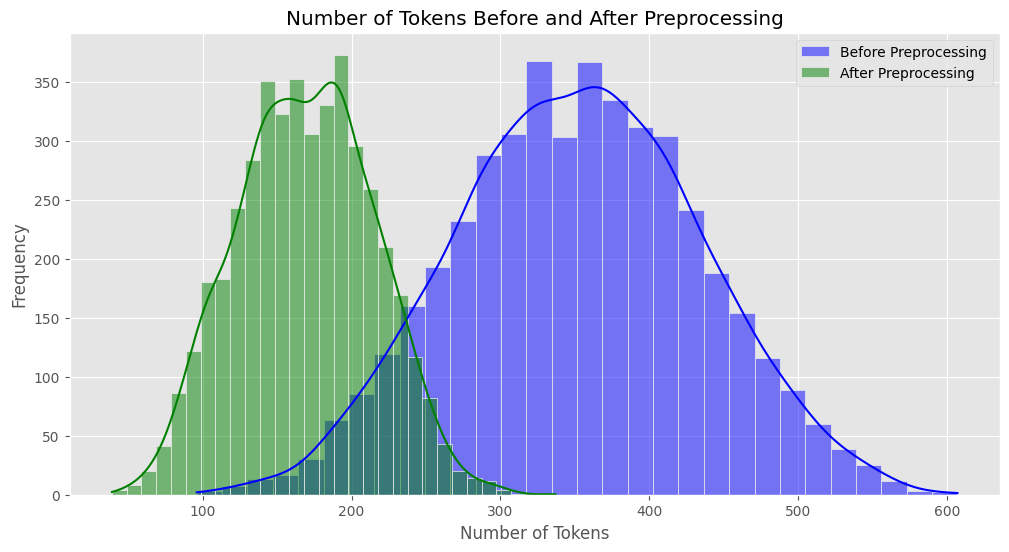

In [30]:
# Analyze token distribution before and after preprocessing
df['num_tokens_before'] = df['text'].apply(lambda x: len(word_tokenize(x)))
df['num_tokens_after'] = df['processed_text'].apply(lambda x: len(word_tokenize(x)))

# Plot token distribution before and after preprocessing
plt.figure(figsize=(12, 6))
sns.histplot(df['num_tokens_before'], bins=30, kde=True, color='blue', label='Before Preprocessing')
sns.histplot(df['num_tokens_after'], bins=30, kde=True, color='green', label='After Preprocessing')
plt.title('Number of Tokens Before and After Preprocessing')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [31]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and apply stemming/lemmatization
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [32]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['processed_text'])

<ipython-input-33-c30d9478ad1e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Term', data=tfidf_df, palette='mako')


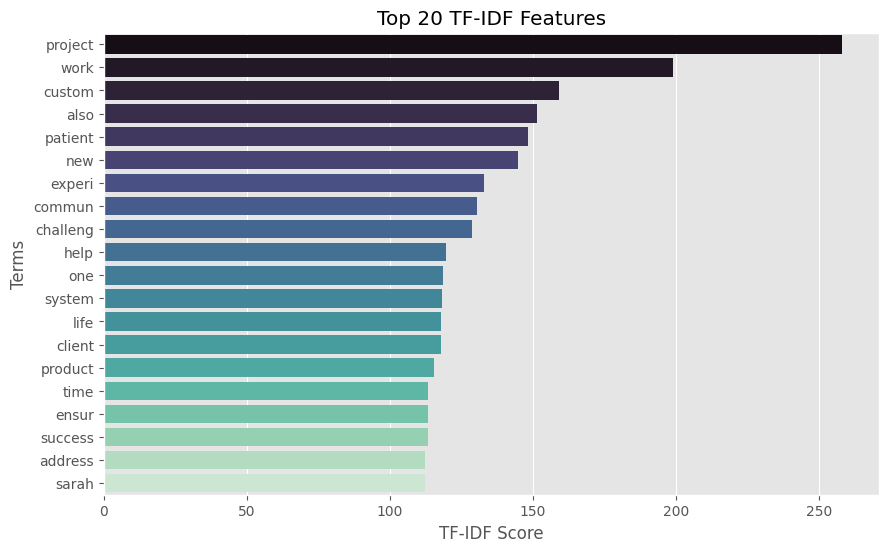

In [33]:
import nltk
import numpy as np # Import numpy
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the TF-IDF feature names and their importance (sum of TF-IDF scores across documents)
tfidf_scores = np.sum(X.toarray(), axis=0)
tfidf_features = vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
tfidf_df = pd.DataFrame({'Term': tfidf_features, 'Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='Score', ascending=False).head(20)  # Top 20 terms

# Plot the top 20 TF-IDF features
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Term', data=tfidf_df, palette='mako')
plt.title('Top 20 TF-IDF Features')
plt.xlabel('TF-IDF Score')
plt.ylabel('Terms')
plt.show()

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['labels'])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=mlb.classes_))


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label 13 is present in all training examples.
  warnings.warn(


              precision    recall  f1-score   support

                   1.00      1.00      1.00       887
           '       1.00      1.00      1.00       887
           ,       1.00      1.00      1.00       887
           -       1.00      1.00      1.00       887
           A       1.00      1.00      1.00       887
           B       1.00      1.00      1.00       887
           D       0.99      1.00      1.00       882
           E       1.00      1.00      1.00       887
           H       0.95      0.90      0.92       482
           I       1.00      1.00      1.00       885
           L       0.92      0.99      0.95       802
           M       1.00      1.00      1.00       884
           N       0.99      1.00      0.99       876
           O       1.00      1.00      1.00       887
           P       0.96      0.92      0.94       586
           R       0.96      0.94      0.95       772
           S       1.00      1.00      1.00       885
           T       0.99    

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label 19 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label 20 is present in all training examples.
  warnings.warn(


In [37]:
# Check the shape of y
print(y.shape)

# If y has multiple columns, you might need to select the appropriate column or convert it
# For example, if y is (3103, 22), you might be using a one-hot encoding format
# Ensure that y is a 1D array of labels
y = y.argmax(axis=1)  # This converts one-hot encoded vectors to class indices


(4434, 22)


In [38]:
print(y.shape)


(4434,)


In [39]:
print(y_train.shape)

(3547, 22)


In [40]:
import numpy as np

# Convert multi-label to single-label by selecting the label with the maximum value
if y_train.ndim == 2:  # If y_train is a 2D array
    y_train_single_label = np.argmax(y_train, axis=1)
else:
    y_train_single_label = y_train


In [41]:
import numpy as np

unique_labels = np.unique(y_train_single_label)
print("Unique labels in y_train:", unique_labels)


Unique labels in y_train: [0]


In [42]:
print("Shape of y:", y.shape)


Shape of y: (4434,)


In [43]:
import numpy as np

if y.ndim == 2:  # For multi-label case
    y_single_label = np.argmax(y, axis=1)
else:  # Already in single-label format
    y_single_label = y


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_single_label, test_size=0.2, stratify=y_single_label, random_state=42)


In [45]:
from collections import Counter

print("Class distribution in training set:", Counter(y_train))
print("Class distribution in test set:", Counter(y_test))


Class distribution in training set: Counter({0: 3547})
Class distribution in test set: Counter({0: 887})


In [46]:
from collections import Counter

print("Class distribution in the entire dataset:", Counter(y))


Class distribution in the entire dataset: Counter({0: 4434})


In [47]:
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_informative=3, n_redundant=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [48]:
from collections import Counter

print("Class distribution in y_train:", Counter(y_train))
print("Class distribution in y_test:", Counter(y_test))


Class distribution in y_train: Counter({0: 729, 1: 71})
Class distribution in y_test: Counter({0: 171, 1: 29})


In [49]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# Check current class distribution
print("Original class distribution in y_train:", Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Resampled class distribution in y_train:", Counter(y_train_resampled))

# Proceed with model training using X_train_resampled and y_train_resampled
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate as usual
y_pred = model.predict(X_test)


Original class distribution in y_train: Counter({0: 729, 1: 71})
Resampled class distribution in y_train: Counter({0: 729, 1: 729})


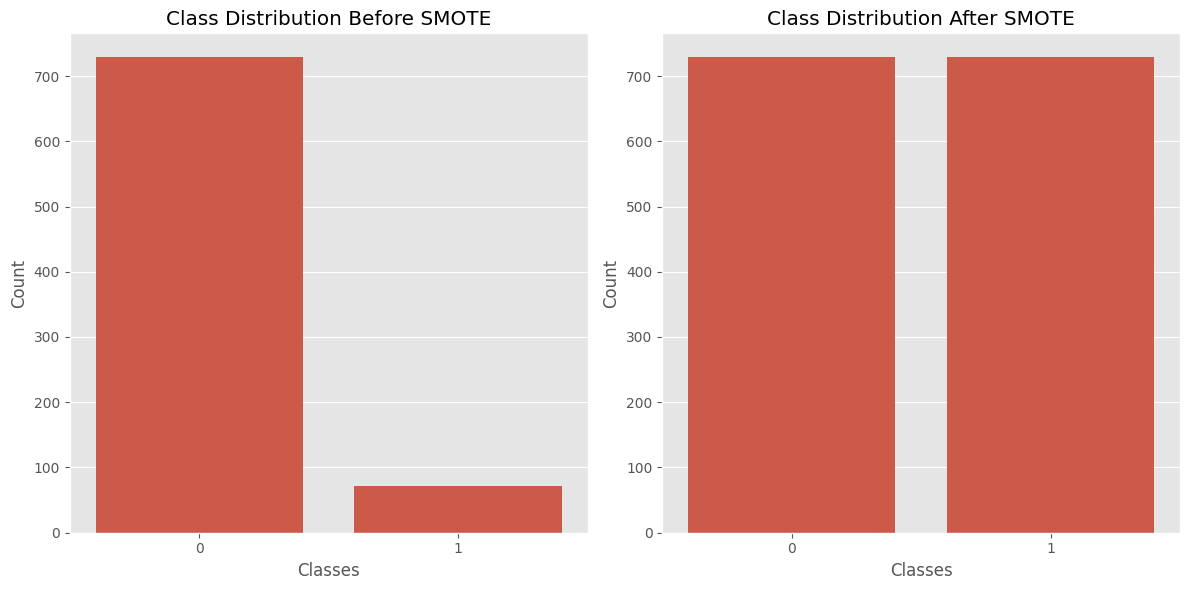

In [50]:
# Visualize class distribution before and after SMOTE resampling
plt.figure(figsize=(12, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Classes')
plt.ylabel('Count')

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Classes')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [51]:
from sklearn.linear_model import LogisticRegression

# Initialize LogisticRegression without multi_class parameter for binary classification
model = LogisticRegression(max_iter=1000, solver='saga')

# Fit the model
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.93
Precision: 0.71
Recall: 0.83
F1 Score: 0.76
Confusion Matrix:
[[161  10]
 [  5  24]]


In [53]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.965 0.975 0.95  0.99  0.965]
Mean CV Score: 0.97


In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga']  # Solvers
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")


Best Parameters: {'C': 0.1, 'solver': 'saga'}
Best Score: 0.94


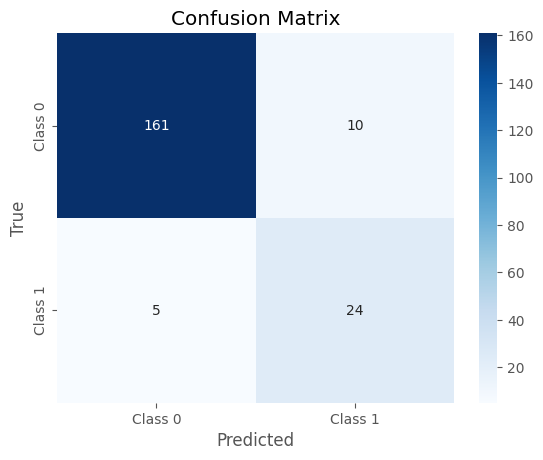

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


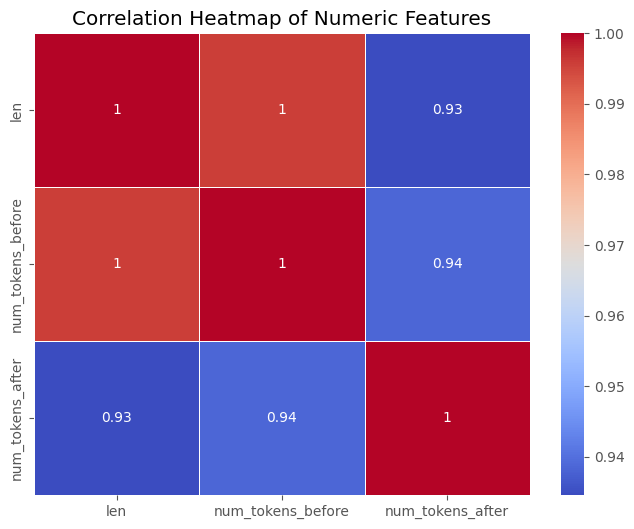

In [56]:
# Generate a correlation matrix for numerical columns
numeric_columns = ['len', 'num_tokens_before', 'num_tokens_after']  # Assuming these columns exist
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [57]:
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [58]:
print(type(X_train))
print(type(X_test))
print(X_train[0])  # Check the content of the first item

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 0.44340569 -0.01574215  0.2154114  -0.23888423 -3.31939282 -1.91616438
 -0.54565899  0.79991095  0.85228969  0.97138989  0.69223489  3.3203157
 -1.02952452  0.96858744 -0.16589268 -0.22175202 -1.19510856  0.53412812
 -0.57993592 -1.64788689]


In [59]:
import numpy as np

print(np.min(X_train))  # Should not be negative for MultinomialNB
print(np.min(X_test))   # Should not be negative for MultinomialNB


-4.06460314373439
-3.9505957101665934


<ipython-input-60-3ebd91e5d021>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Token', data=common_tokens_df, palette='deep')


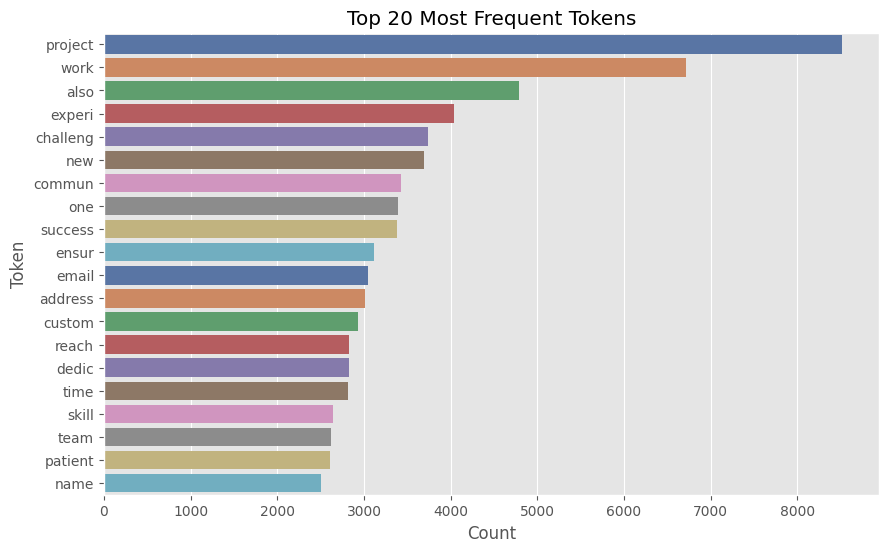

In [60]:
from collections import Counter

# Flatten all tokens and count their occurrences
all_tokens = [word for text in df['processed_text'] for word in word_tokenize(text)]
token_counts = Counter(all_tokens)

# Convert to DataFrame and plot the top 20 most common tokens
common_tokens_df = pd.DataFrame(token_counts.most_common(20), columns=['Token', 'Count'])

# Plot token frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Token', data=common_tokens_df, palette='deep')
plt.title('Top 20 Most Frequent Tokens')
plt.xlabel('Count')
plt.ylabel('Token')
plt.show()


# **Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"Logistic Regression Precision: {precision_score(y_test, y_pred_log_reg):.2f}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_log_reg):.2f}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, y_pred_log_reg):.2f}")
print(f"Logistic Regression Confusion Matrix:\n{confusion_matrix(y_test, y_pred_log_reg)}")


Logistic Regression Accuracy: 0.95
Logistic Regression Precision: 0.95
Logistic Regression Recall: 0.72
Logistic Regression F1 Score: 0.82
Logistic Regression Confusion Matrix:
[[170   1]
 [  8  21]]


# **SVM**

In [62]:
from sklearn.svm import LinearSVC

# Define the SVM model
svm_model = LinearSVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"SVM Precision: {precision_score(y_test, y_pred_svm):.2f}")
print(f"SVM Recall: {recall_score(y_test, y_pred_svm):.2f}")
print(f"SVM F1 Score: {f1_score(y_test, y_pred_svm):.2f}")
print(f"SVM Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}")


SVM Accuracy: 0.96
SVM Precision: 1.00
SVM Recall: 0.72
SVM F1 Score: 0.84
SVM Confusion Matrix:
[[171   0]
 [  8  21]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# **Random Forest**

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Random Forest Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"Random Forest F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")


Random Forest Accuracy: 0.94
Random Forest Precision: 1.00
Random Forest Recall: 0.62
Random Forest F1 Score: 0.77
Random Forest Confusion Matrix:
[[171   0]
 [ 11  18]]


# Redact sensitive data


Redacted DataFrame:

                               document  \
0  1073d46f-2241-459b-ab01-851be8d26436   
1  5ec717a9-17ee-48cd-9d76-30ae256c9354   
2  353da41e-7799-4071-ab20-d959b362612e   
3  9324ee01-7bdc-41b1-a7a5-01307f72c20d   
4  971fe266-2739-4f1b-979b-7f64e07d5a4a   

                                                text  \
0  My name is Aaliyah Popova, and I am a jeweler ...   
1  My name is Konstantin Becker, and I'm a develo...   
2  As Mieko Mitsubishi, an account manager at a p...   
3  My name is Kazuo Sun, and I'm an air traffic c...   
4  My name is Arina Sun, and I'm a dental hygieni...   

                                              tokens  \
0  ['My', 'name', 'is', 'Aaliyah', 'Popova,', 'an...   
1  ['My', 'name', 'is', 'Konstantin', 'Becker,', ...   
2  ['As', 'Mieko', 'Mitsubishi,', 'an', 'account'...   
3  ['My', 'name', 'is', 'Kazuo', 'Sun,', 'and', "...   
4  ['My', 'name', 'is', 'Arina', 'Sun,', 'and', "...   

                                 trailing_whi

<ipython-input-65-6bd9f3db3cc4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='coolwarm')


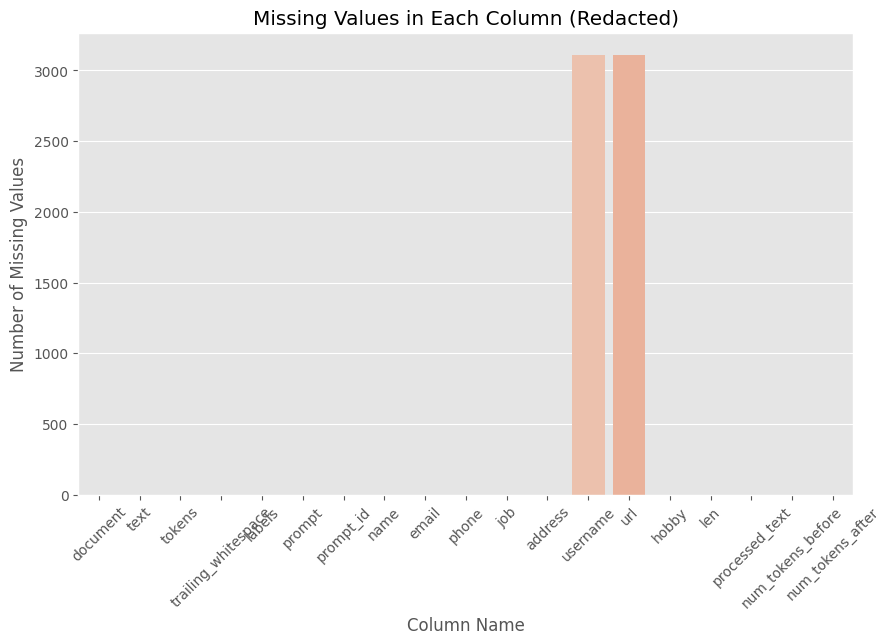

In [65]:
# Define the columns that contain sensitive information (PII)
pii_columns = ['name', 'email', 'phone', 'job', 'address', 'username', 'url', 'hobby']

# Function to redact sensitive information
def redact_sensitive_data(df, pii_columns):
    # Iterate through each PII column and redact non-null values
    for column in pii_columns:
        df[column] = df[column].apply(lambda x: "[REDACTED]" if pd.notnull(x) else x)
    return df

# Apply the redaction function
df_redacted = redact_sensitive_data(df, pii_columns)

# Display the redacted dataframe
print("\nRedacted DataFrame:\n")
print(df_redacted.head())


# Example of visualizing missing values (post-redaction)
missing_values = df_redacted.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='coolwarm')
plt.title('Missing Values in Each Column (Redacted)')
plt.ylabel('Number of Missing Values')
plt.xlabel('Column Name')
plt.xticks(rotation=45)
plt.show()

In [64]:
#---------------------------------------------------END-------------------------------------------------------------------------------------------